<a href="https://colab.research.google.com/github/sabazarean/AndroidProject/blob/master/user_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Task 1:
 Data Exploration

In [ ]:

# Load the dataset from my google drive in colab

import sys
from google.colab import drive
drive.mount('/content/gdrive')
sys.path.insert(0, '/content/gdrive/My Drive/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Data Preview
data = pd.read_excel('gdrive/My Drive/P2_user_segmentation.xlsx')

data

,Mobile Key,Person Is Alive,Person Birth Date,Person Gender Title,Person First Name,Person Last Name,Mobile Number Encrypt,Mobile Number Masked,FirstAppInstallDate,Mobile Operator Id,...,CMS_Balance,LastTrsDateWallet,FirstProvince,SecondProvince,FirstRegion,SecondRegion,FirstGuild,SecondGuild,ThirdGuild,AllGuild
0,2,True,1997-10-09,مرد,مجید,ملکی,HN8x8N88m+sikOUIs4Iuxg==,0938***0926,2017-04-18 20:15:22.910,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,NaN,NaT,NaN,NaN,NaN,/Y38H9ETC2tMantBTYBQzw==,0913***9963,2014-12-15 21:59:03.870,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,NaN,NaT,NaN,NaN,NaN,ThuZBrT+/BueLw7LxSX15w==,0919***0132,2016-04-18 10:15:01.480,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,True,1979-07-13,مرد,حمیدرضا,عزیزی مربویه,0sEbFPeIKs9cCJLA73cOoQ==,0917***4959,2020-01-13 23:07:15.570,1,...,NaN,NaN,فارس,فارس,شيراز,شيراز,5411,"5499,5311",5811,"5411,5441,7538,5533,5462,8062,5533,5411,5814,7..."
4,9,True,1979-03-11,مرد,امیدعلی,احمدپور,FZT2oVrc5UCFaN8gjELmCg==,0917***8979,2016-11-22 22:03:27.060,1,...,568580.0,2023-07-23 13:56:44,فارس,فارس,مرودشت,شيراز,5411,5251,5411,"1731,5261,5411,5812,5065,5065,5814,5441,5411,8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,125060,NaN,NaT,NaN,NaN,NaN,pDcHaQlw4rFir+7T1rBFEQ==,0915***7614,2017-11-16 21:45:59.757,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,125068,True,1979-03-21,مرد,حمید,پارسای جرفی,/Iv74VOVi1nIVBK006oiTA==,0915***6893,2018-07-06 19:38:36.493,1,...,NaN,NaN,خراسان رضوي,خراسان رضوي,مشهد,کلات,5462,5411,"8931,5251,5169,5499","5533,5411,5691,5462,7216,5814,5811,8931,5300,7..."
49997,125071,NaN,NaT,NaN,NaN,NaN,SFqmPCgQQuhu9iyXJNxG+Q==,0914***7368,2021-09-04 20:47:17.843,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,125072,NaN,NaT,NaN,NaN,NaN,QsN0ea3HyEgMsqZpmq/ywA==,0917***4369,2016-08-02 20:37:16.367,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.head())

   Mobile Key Person Is Alive Person Birth Date Person Gender Title  \
0           2            True        1997-10-09                 مرد   
1           4             NaN               NaT                 NaN   
2           6             NaN               NaT                 NaN   
3           7            True        1979-07-13                 مرد   
4           9            True        1979-03-11                 مرد   

  Person First Name Person Last Name     Mobile Number Encrypt  \
0              مجید             ملکی  HN8x8N88m+sikOUIs4Iuxg==   
1               NaN              NaN  /Y38H9ETC2tMantBTYBQzw==   
2               NaN              NaN  ThuZBrT+/BueLw7LxSX15w==   
3           حمیدرضا     عزیزی مربویه  0sEbFPeIKs9cCJLA73cOoQ==   
4           امیدعلی          احمدپور  FZT2oVrc5UCFaN8gjELmCg==   

  Mobile Number Masked     FirstAppInstallDate  Mobile Operator Id  ...  \
0          0938***0926 2017-04-18 20:15:22.910                   2  ...   
1          0913***9963 201

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 106 entries, Mobile Key to AllGuild
dtypes: datetime64[ns](2), float64(77), int64(3), object(24)
memory usage: 40.4+ MB
None


Detecting Missing Values

In [ ]:
print(data.isnull().sum())

Mobile Key                 0
Person Is Alive        33819
Person Birth Date      34421
Person Gender Title    33851
Person First Name      33819
                       ...  
SecondRegion           39957
FirstGuild             38353
SecondGuild            39352
ThirdGuild             41023
AllGuild               38353
Length: 106, dtype: int64


In [ ]:
data.isnull().sum() * 100 / len(data)

,0
Mobile Key,0.000
Person Is Alive,67.638
Person Birth Date,68.842
Person Gender Title,67.702
Person First Name,67.638
...,...
SecondRegion,79.914
FirstGuild,76.706
SecondGuild,78.704
ThirdGuild,82.046



# Data Visualization

In [ ]:
# Statistical Summary
print(data.describe())


          Mobile Key              Person Birth Date  \
count   50000.000000                          15579   
mean    63710.034500  1982-11-14 14:31:21.455805824   
min         2.000000            1926-09-24 00:00:00   
25%     33096.750000            1977-03-13 00:00:00   
50%     64329.000000            1984-10-22 00:00:00   
75%     95063.250000            1990-01-29 00:00:00   
max    125074.000000            2012-05-04 00:00:00   
std     36134.249738                            NaN   

                 FirstAppInstallDate  Mobile Operator Id  \
count                          50000        50000.000000   
mean   2018-12-13 03:26:28.597302016            1.354580   
min       2014-12-01 21:45:03.027000            1.000000   
25%    2017-08-08 22:13:58.562500096            1.000000   
50%       2018-09-11 15:00:31.040000            1.000000   
75%    2020-08-16 08:26:59.817250048            2.000000   
max       2023-07-24 17:37:55.923000            2.000000   
std                     

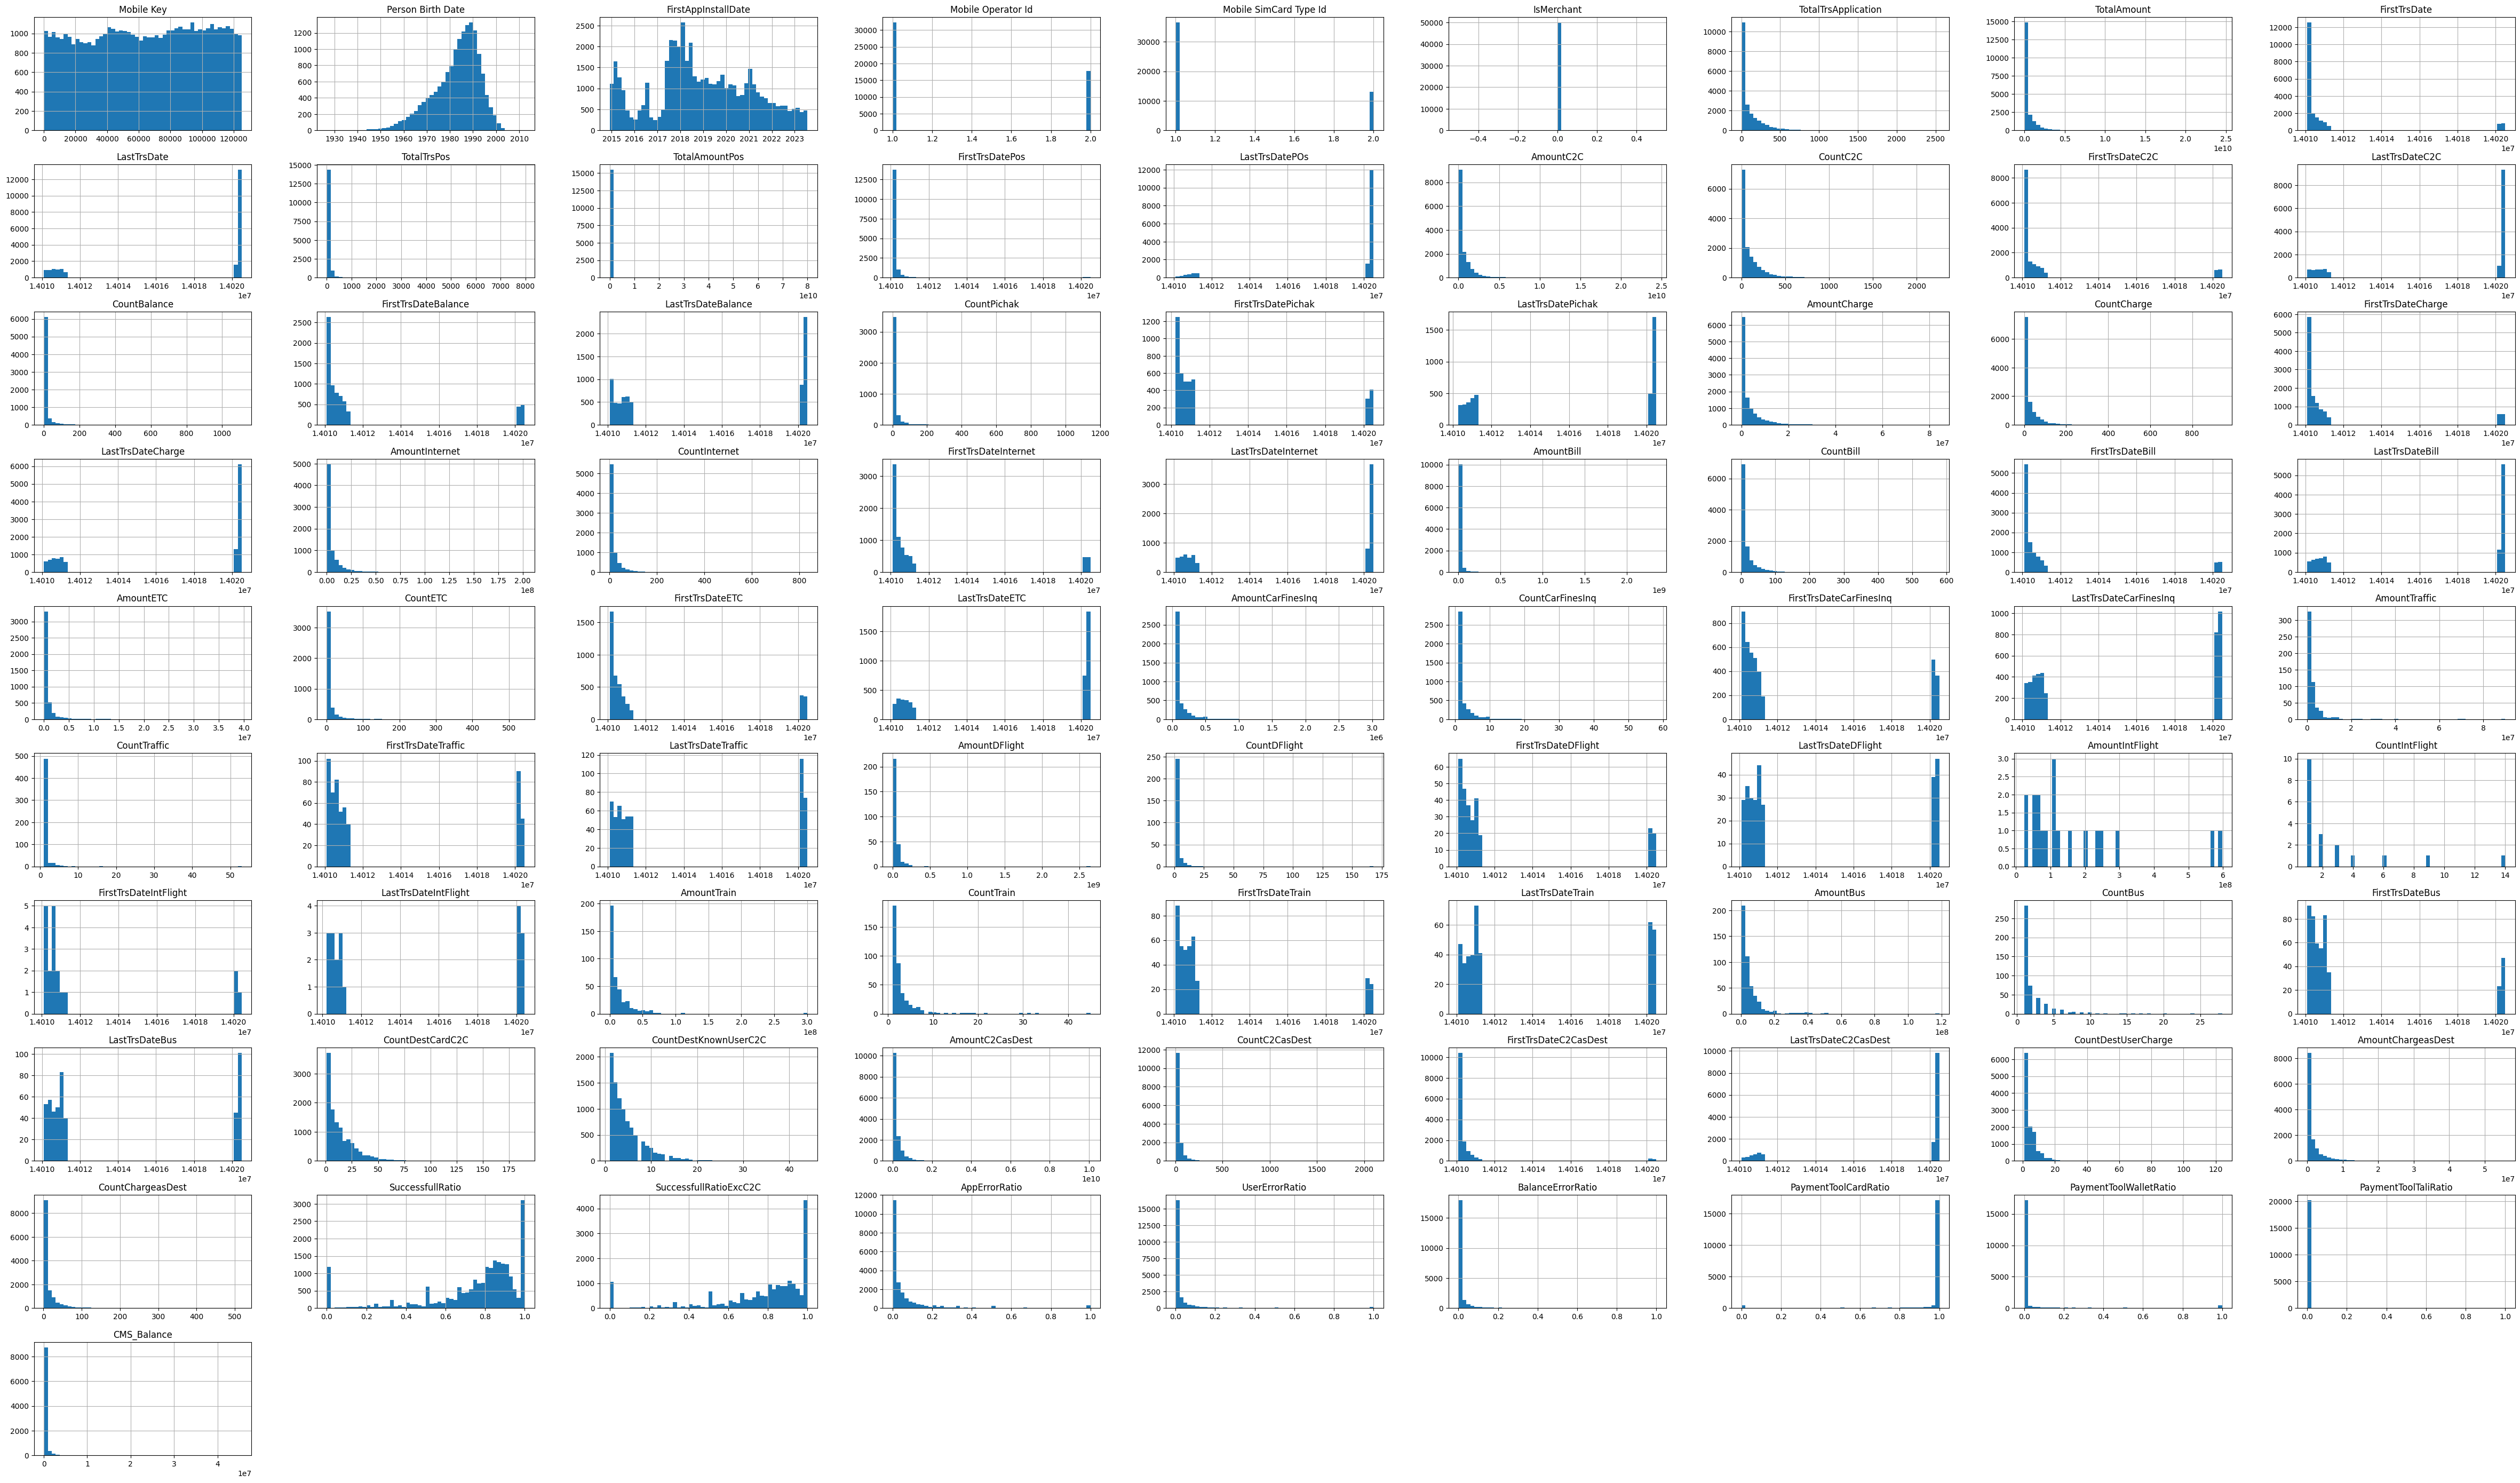

In [ ]:
# Histograms for numerical features
data.hist(bins=50, figsize=(60, 35))
plt.show()


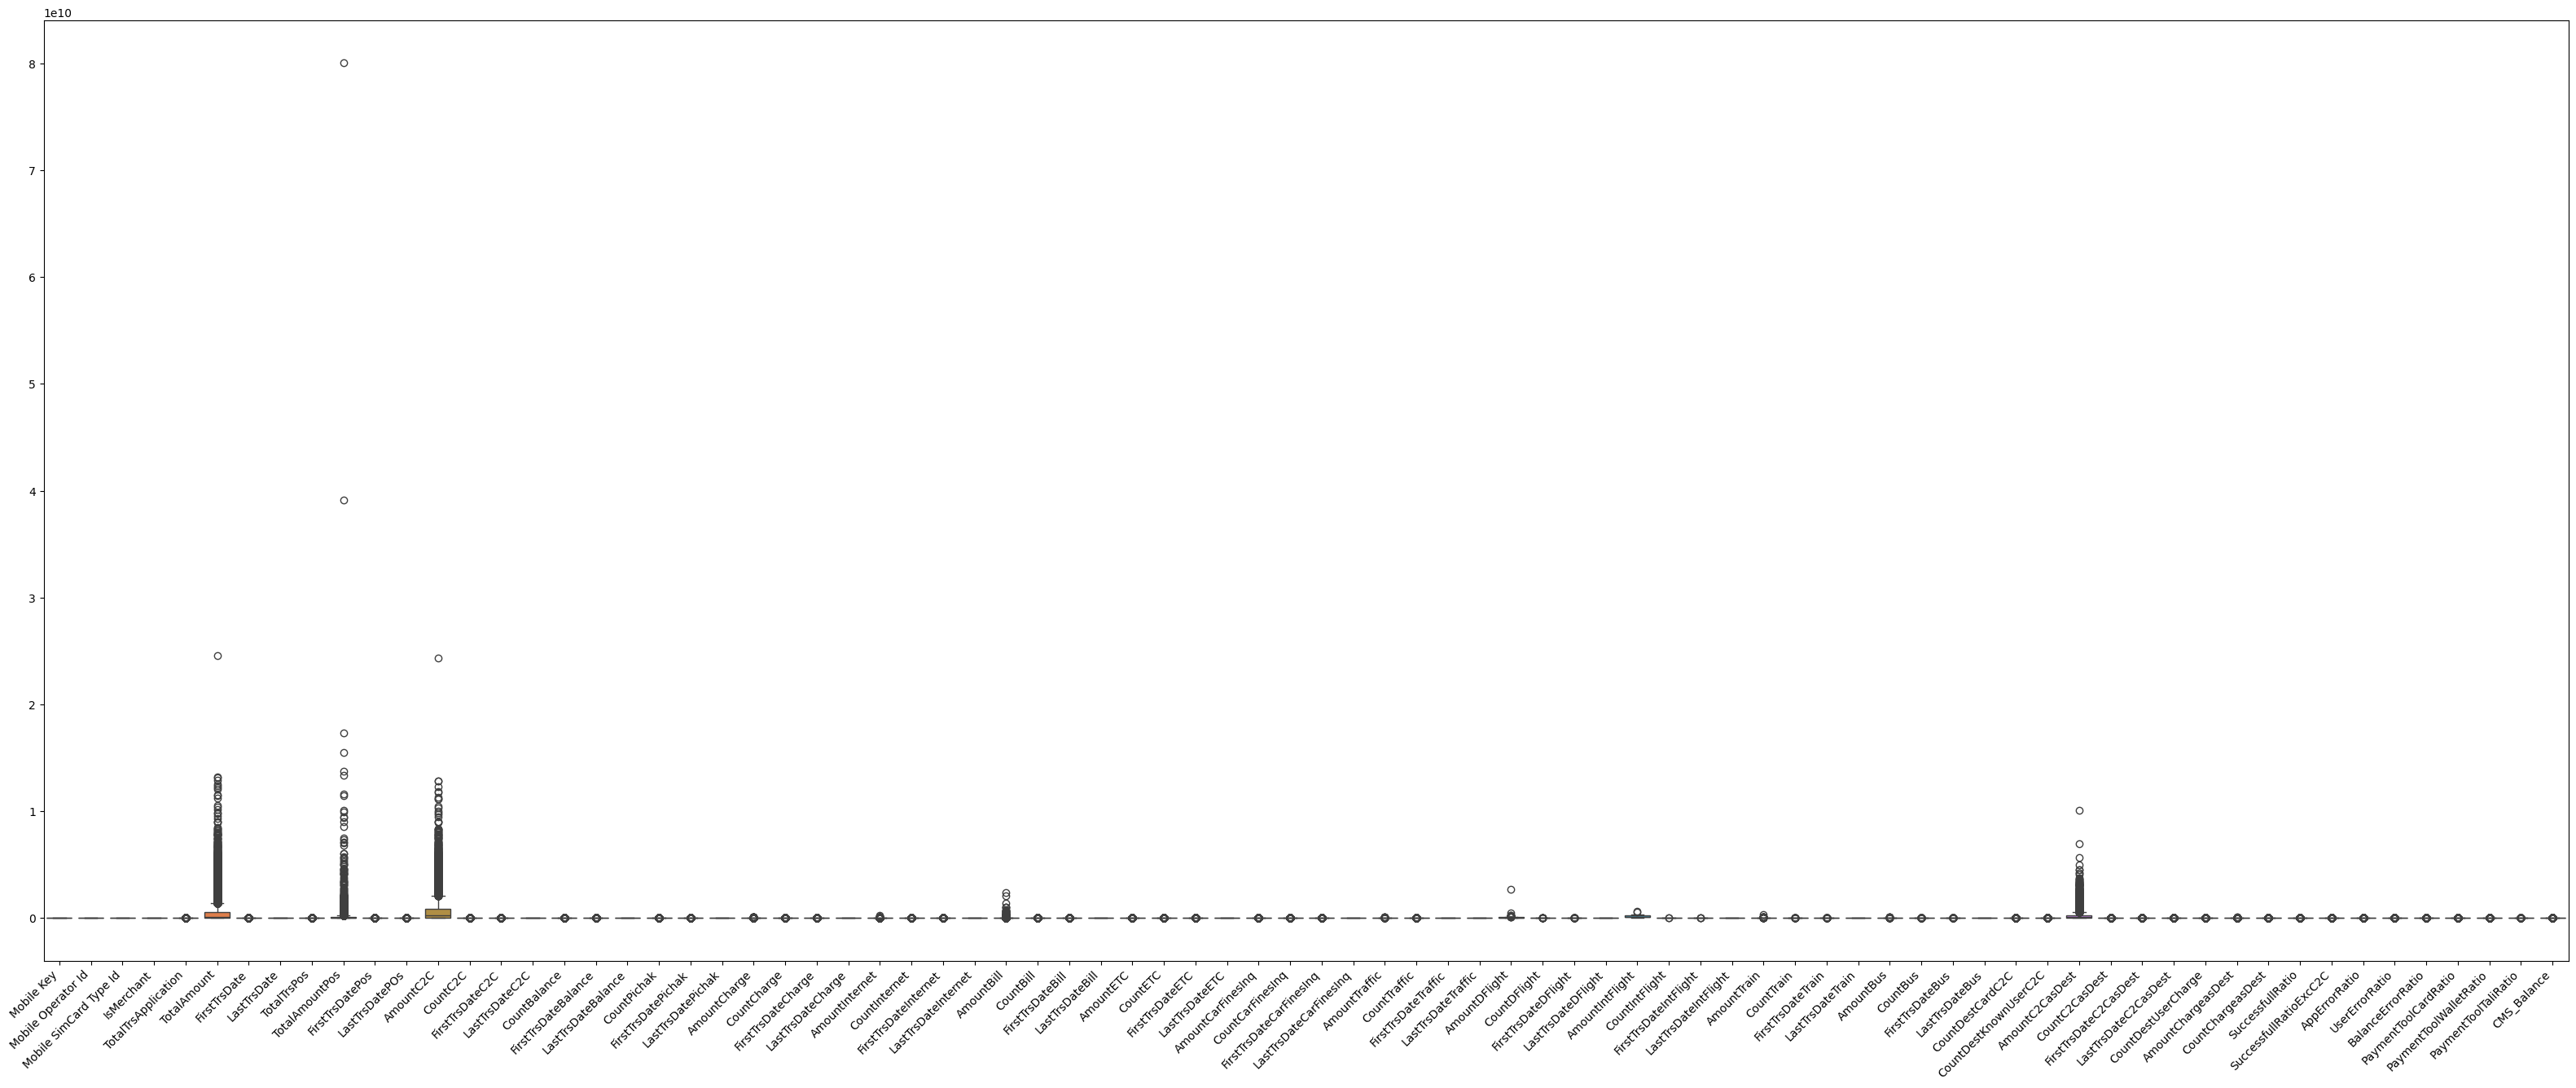

In [ ]:
# Box plots for numerical features
plt.figure(figsize=(40, 15))
sns.boxplot(data=data.select_dtypes(include=['number']))
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# prompt: Correlation matrix for numerical features

# Correlation matrix for numerical features
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
# Correlation matrix
#first we drop demographic featureas to avoid biasis

demographic_columns = ['UserOwnedBanks', 'BankswithTrs', 'IsMerchant', 'Mobile Application Download Source Title','Mobile Device Brand',
                       'Mobile Device Model', 'Mobile SimCard Type Id', 'Mobile Device OS Title','Mobile Operator Id',
                       'FirstAppInstallDate','Mobile Number Masked', 'Mobile Number Encrypt','Person Last Name','Person First Name',
                       'Person Gender Title','Person Birth Date','Person Is Alive'
                       ] # Example, replace with your actual column names

# Drop the specified demographic columns
data_corr = data.drop(columns=demographic_columns, errors='ignore')


plt.figure(figsize=(12, 10))
correlation_matrix = data_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'ETC, ChargeMTN, BillWater, Pichak, BillGas, BillPhone, BillMobile'

<Figure size 1200x1000 with 0 Axes>

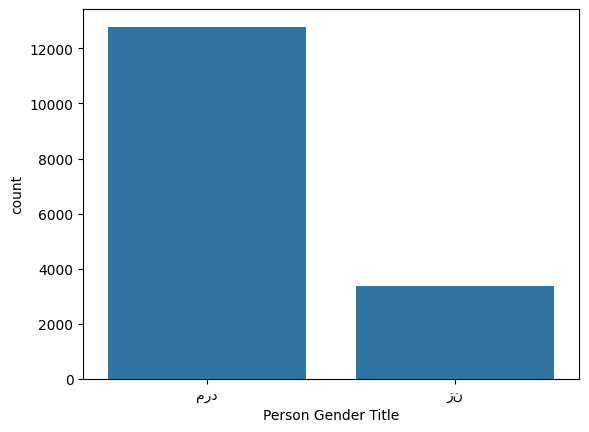

In [ ]:

sns.countplot(x='Person Gender Title', data=data)
plt.show()



In [ ]:
data.fillna(0, inplace=True)

<ipython-input-44-094b30ae9a00>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.fillna(0, inplace=True)


         Recency    Frequency  MonetaryValue
Cluster                                     
0            0.0   263.405685   5.652000e+08
1            0.0    11.690899   1.913483e+07
2            0.0  2545.000000   5.958639e+10
3            0.0  6017.333333   7.196813e+08


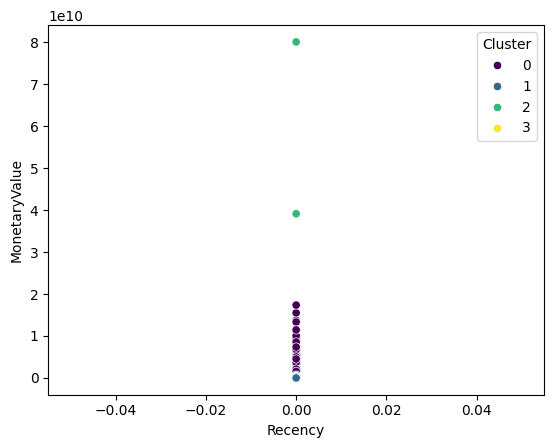

,Mobile Key,Person Is Alive,Person Birth Date,Person Gender Title,Person First Name,Person Last Name,Mobile Number Encrypt,Mobile Number Masked,FirstAppInstallDate,Mobile Operator Id,...,FirstRegion,SecondRegion,FirstGuild,SecondGuild,ThirdGuild,AllGuild,Recency,Frequency,MonetaryValue,Cluster
0,2,True,1997-10-09 00:00:00,مرد,مجید,ملکی,HN8x8N88m+sikOUIs4Iuxg==,0938***0926,2017-04-18 20:15:22.910,2,...,0,0,0,0,0,0,0,0.0,0.000000e+00,1
1,4,0,0,0,0,0,/Y38H9ETC2tMantBTYBQzw==,0913***9963,2014-12-15 21:59:03.870,1,...,0,0,0,0,0,0,0,0.0,0.000000e+00,1
2,6,0,0,0,0,0,ThuZBrT+/BueLw7LxSX15w==,0919***0132,2016-04-18 10:15:01.480,1,...,0,0,0,0,0,0,0,0.0,0.000000e+00,1
3,7,True,1979-07-13 00:00:00,مرد,حمیدرضا,عزیزی مربویه,0sEbFPeIKs9cCJLA73cOoQ==,0917***4959,2020-01-13 23:07:15.570,1,...,شيراز,شيراز,5411,"5499,5311",5811,"5411,5441,7538,5533,5462,8062,5533,5411,5814,7...",0,46.0,9.920016e+07,1
4,9,True,1979-03-11 00:00:00,مرد,امیدعلی,احمدپور,FZT2oVrc5UCFaN8gjELmCg==,0917***8979,2016-11-22 22:03:27.060,1,...,مرودشت,شيراز,5411,5251,5411,"1731,5261,5411,5812,5065,5065,5814,5441,5411,8...",0,196.0,2.696955e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,125060,0,0,0,0,0,pDcHaQlw4rFir+7T1rBFEQ==,0915***7614,2017-11-16 21:45:59.757,1,...,0,0,0,0,0,0,0,0.0,0.000000e+00,1
49996,125068,True,1979-03-21 00:00:00,مرد,حمید,پارسای جرفی,/Iv74VOVi1nIVBK006oiTA==,0915***6893,2018-07-06 19:38:36.493,1,...,مشهد,کلات,5462,5411,"8931,5251,5169,5499","5533,5411,5691,5462,7216,5814,5811,8931,5300,7...",0,55.0,5.214060e+07,1
49997,125071,0,0,0,0,0,SFqmPCgQQuhu9iyXJNxG+Q==,0914***7368,2021-09-04 20:47:17.843,1,...,0,0,0,0,0,0,0,0.0,0.000000e+00,1
49998,125072,0,0,0,0,0,QsN0ea3HyEgMsqZpmq/ywA==,0917***4369,2016-08-02 20:37:16.367,1,...,0,0,0,0,0,0,0,0.0,0.000000e+00,1


In [ ]:


# RFM Analysis
# Calculate Recency, Frequency, and Monetary Value
# Assuming 'Recency' is represented by 'LastTrsDate', 'Frequency' by 'TotalTrs', and 'MonetaryValue' by 'TotalAmountPos'
# Adapt column names as needed based on your actual dataset

# Convert 'LastTrsDate' to datetime if it's not already
data['LastTrsDate'] = pd.to_datetime(data['LastTrsDate'])

# Calculate Recency (days since last transaction)
data['Recency'] = (data['LastTrsDate'].max() - data['LastTrsDate']).dt.days


# Use existing columns for TotalTrsPos and Monetary Value
data['Frequency'] = data['TotalTrsPos']
data['MonetaryValue'] = data['TotalAmountPos']


# Scaling the RFM features
rfm_features = ['Recency', 'Frequency', 'MonetaryValue']
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(data[rfm_features])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # You can adjust the number of clusters
data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze the clusters
print(data.groupby('Cluster')[rfm_features].mean())
# Visualize the clusters
sns.scatterplot(x='Recency', y='MonetaryValue', hue='Cluster', data=data, palette='viridis')
plt.show()

# Display the dataframe with clusters
data

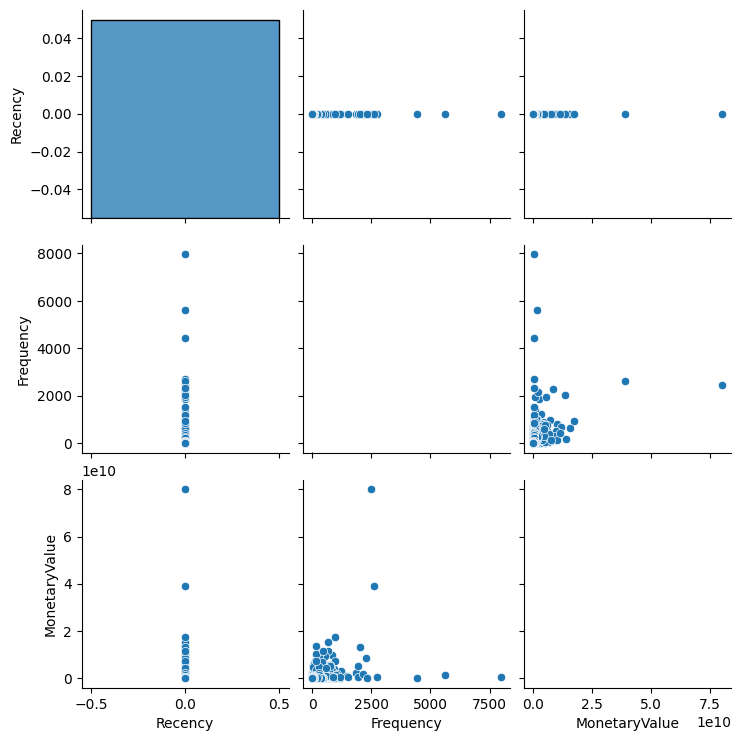

In [ ]:
sns.pairplot(data[['Recency', 'Frequency', 'MonetaryValue']])  # Example
plt.show()

In [ ]:
# prompt: Insights Generation: From your analysis and segmentation, draw at least three meaningful
# insights that could help our company better understand our customer base and make informed
# business decisions.

# Insight 1: Identify high-value customers
high_value_cluster = data.groupby('Cluster')['MonetaryValue'].mean().idxmax()
print(f"High-value customer segment is Cluster {high_value_cluster}")
print(data[data['Cluster'] == high_value_cluster].describe())

# Insight 2: Analyze customer recency
low_recency_cluster = data.groupby('Cluster')['Recency'].mean().idxmin()
print(f"Customers who transacted recently are in Cluster {low_recency_cluster}")
print(data[data['Cluster'] == low_recency_cluster].describe())


# Insight 3:  Segmentation based on both MonetaryValue and Frequency
# Find the cluster with highest MonetaryValue and high Frequency
cluster_analysis = data.groupby('Cluster').agg({'MonetaryValue': 'mean', 'Frequency': 'mean'})
cluster_analysis['MonetaryValue_rank'] = cluster_analysis['MonetaryValue'].rank(ascending=False)
cluster_analysis['Frequency_rank'] = cluster_analysis['Frequency'].rank(ascending=False)

# Identify cluster with the highest combination of monetary and frequency
best_cluster = cluster_analysis[(cluster_analysis['MonetaryValue_rank'] <= 2) & (cluster_analysis['Frequency_rank'] <=2)].index.tolist()

print(f"Clusters with high monetary value and high frequency transactions are: {best_cluster}")

print(data[data['Cluster'].isin(best_cluster)].describe())

In [ ]:
# prompt: Presentation/Report: Present your findings, insights, and customer segments in  a
# presentation charts and a written report. Ensure your communication is clear and concise, addressing
# both technical and non-technical stakeholders

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame from the previous code is available

# --- Presentation/Report Content ---

# Section 1: Executive Summary (Non-technical)
print("Executive Summary:")
print("Customer segmentation analysis reveals distinct groups based on their transaction behavior.")
print("Key insights include identifying high-value customers, understanding recent activity, and pinpointing segments with high monetary and transaction frequency.")
print("These findings can inform targeted marketing strategies and personalized customer experiences.")

# Section 2: Data Overview (Technical/Non-technical)
print("\nData Overview:")
print(data.describe()) # Basic statistics for numerical features
print("\nMissing Values:")
print(data.isnull().sum()) # Display missing values before handling them

# Section 3: Customer Segmentation (Technical)
print("\nCustomer Segmentation (RFM Analysis):")
print(data.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean())

# Visualization 1: Scatter plot for clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='MonetaryValue', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation based on Recency and Monetary Value')
plt.show()

# Visualization 2: Distribution of Monetary Value by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='MonetaryValue', data=data)
plt.title('Distribution of Monetary Value across Clusters')
plt.show()

# Visualization 3: Distribution of Frequency by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Frequency', data=data)
plt.title('Distribution of Frequency across Clusters')
plt.show()


# Section 4: Key Insights and Customer Segments (Non-technical/Technical)
print("\nKey Insights:")

print("\nHigh-Value Customers:")
high_value_cluster = data.groupby('Cluster')['MonetaryValue'].mean().idxmax()
print(f"High-value customer segment is Cluster {high_value_cluster}")
print(data[data['Cluster'] == high_value_cluster].describe())

print("\nRecent Customers:")
low_recency_cluster = data.groupby('Cluster')['Recency'].mean().idxmin()
print(f"Customers who transacted recently are in Cluster {low_recency_cluster}")
print(data[data['Cluster'] == low_recency_cluster].describe())


print("\nHigh Monetary & Frequency Customers:")
cluster_analysis = data.groupby('Cluster').agg({'MonetaryValue': 'mean', 'Frequency': 'mean'})
cluster_analysis['MonetaryValue_rank'] = cluster_analysis['MonetaryValue'].rank(ascending=False)
cluster_analysis['Frequency_rank'] = cluster_analysis['Frequency'].rank(ascending=False)
best_cluster = cluster_analysis[(cluster_analysis['MonetaryValue_rank'] <= 2) & (cluster_analysis['Frequency_rank'] <= 2)].index.tolist()
print(f"Clusters with high monetary value and high frequency transactions are: {best_cluster}")
print(data[data['Cluster'].isin(best_cluster)].describe())


# Section 5: Recommendations (Non-technical)
print("\nRecommendations:")
print("Target high-value customer segments with premium offers and personalized promotions.")
print("Engage recently active customers with relevant product recommendations or loyalty programs.")
print("Focus on increasing transaction frequency from the identified high-potential customers.")
